In [7]:
import pandas as pd
import matplotlib. pyplot as plt 

In [3]:
url ='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_inc.csv'
df = pd.read_csv(url)
df = df.rename(columns={'Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)': 'Incidence of malaria'})

In [4]:
for i in range(df.shape[0]):
    if (pd.isna(df['Code'][i]) == True or df['Code'][i] =='OWID_WRL'):
        df=df.drop([i])
df=df.reset_index()

In [8]:
df['continent_name'] = '.'
df['Code_trans'] = '.'
import pycountry_convert as pc
for p in range(df.shape[0]):
    df.Code_trans[p] =pc.country_name_to_country_alpha2(df.Code[p])
    if(df['Code_trans'][p] != 'TL'):
        df['continent_name'][p] = pc.country_alpha2_to_continent_code( df['Code_trans'][p])
    else:
        df['continent_name'][p] = 'AS'
           

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


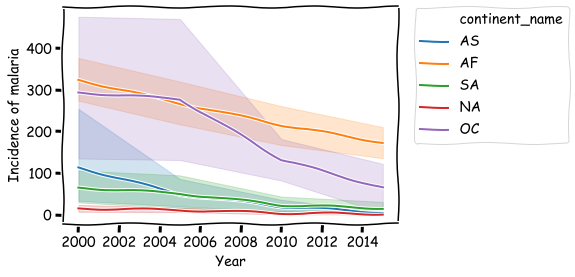

In [9]:
import seaborn as sns
with plt.xkcd():
    g=sns.lineplot(data=df, x='Year',y='Incidence of malaria',hue='continent_name')
    plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [12]:
url ='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths.csv'
df = pd.read_csv(url)
df = df.rename(columns={'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)': 'Deaths of malaria'})
for i in range(df.shape[0]):
    if (pd.isna(df['Code'][i]) == True or df['Code'][i] =='OWID_WRL'):
        df=df.drop([i])
df=df.reset_index()

In [13]:
df['continent_name'] = '.'
df['Code_trans'] = '.'
for p in range(df.shape[0]):
    #print(p)
    df.Code_trans[p] =pc.country_name_to_country_alpha2(df.Code[p])
    if(df['Code_trans'][p] != 'TL'):
        df['continent_name'][p] = pc.country_alpha2_to_continent_code( df['Code_trans'][p])
    else:
        df['continent_name'][p] = 'AS'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [14]:
AS= df.loc[df['continent_name'] == 'AS']
EU= df.loc[df['continent_name'] == 'EU']
AF= df.loc[df['continent_name'] == 'AF']
OC= df.loc[df['continent_name'] == 'OC']
NA= df.loc[df['continent_name'] == 'NA']
SA= df.loc[df['continent_name'] == 'SA']

AS_year=AS.groupby('Year')['Deaths of malaria'].mean()
EU_year=EU.groupby('Year')['Deaths of malaria'].mean()
AF_year=AF.groupby('Year')['Deaths of malaria'].mean()
OC_year=OC.groupby('Year')['Deaths of malaria'].mean()
NA_year=NA.groupby('Year')['Deaths of malaria'].mean()
SA_year=SA.groupby('Year')['Deaths of malaria'].mean()

AS_year=pd.DataFrame(AS_year)
EU_year=pd.DataFrame(EU_year)
AF_year=pd.DataFrame(AF_year)
OC_year=pd.DataFrame(OC_year)
NA_year=pd.DataFrame(NA_year)
SA_year=pd.DataFrame(SA_year)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


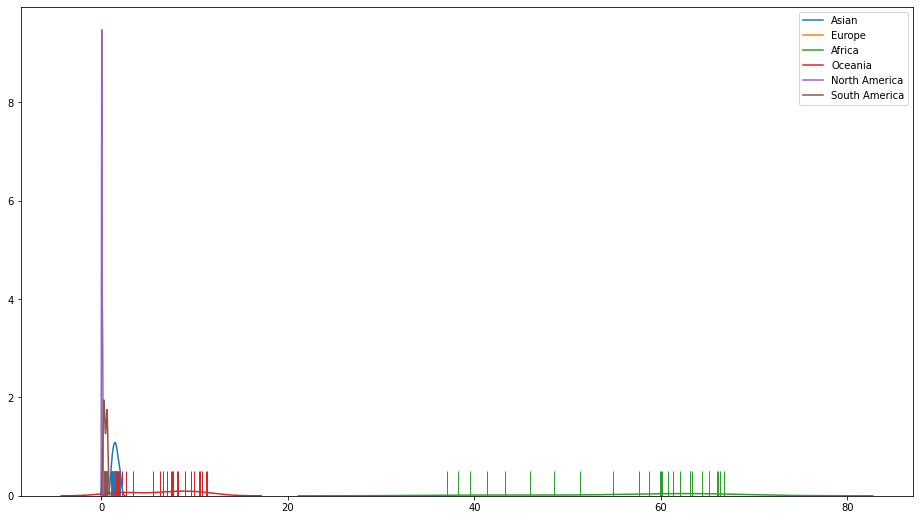

In [15]:
plt.figure(figsize=(16,9))

sns.distplot(AS_year[['Deaths of malaria']], hist=False, rug=True,label="Asian")
sns.distplot(EU_year[['Deaths of malaria']], hist=False, rug=True,label="Europe")
sns.distplot(AF_year[['Deaths of malaria']], hist=False, rug=True,label="Africa")
sns.distplot(OC_year[['Deaths of malaria']], hist=False, rug=True,label="Oceania")
sns.distplot(NA_year[['Deaths of malaria']], hist=False, rug=True,label="North America")
sns.distplot(SA_year[['Deaths of malaria']], hist=False, rug=True,label="South America")
#plt.title('add title here')
plt.show()

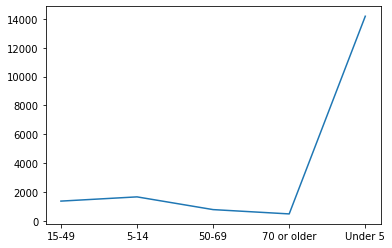

In [18]:
url ='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv'
df = pd.read_csv(url)
b=df.groupby('age_group')['deaths'].mean()
plt.plot(b)